### 특징 벡터의 파라미터로 들어갈 features (단일값 산출이 가능한 것 위주로 선정)
- **MFCC**
- **tempo**(global tempo)
- **spectral centroid**
- **spectral roll-off**
- spectral valley => zero-crossing rate로 대체
- spectral spread (분산 범위)(구하는 법 아직 못찾음)
- spectral flux (구하는 법 아직 못찾음)

In [49]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering
from scipy.cluster import hierarchy

# 1. 벡터 차원 축소
## 1) 순차적 특징 선택

In [18]:
df = pd.read_csv("music.csv")#; df.index.name = 'record' 뭔지몰겠음
cols = ['tempo','centroid','roll-off','mfcc1','mfcc2','mfcc3','mfcc4','mfcc5','mfcc6','mfcc7','mfcc8','mfcc9','mfcc10']

x = df[cols]
y = df['category']

svc = SVC(kernel="linear", C=1)
rfe = RFE(estimator=svc, n_features_to_select=2, step=1)
rfe.fit(x,y)

print(cols)
print(rfe.ranking_)

['tempo', 'centroid', 'roll-off', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10']
[12 10 11  7  3  2  4  1  1  5  6  9  8]


## 2) PCA

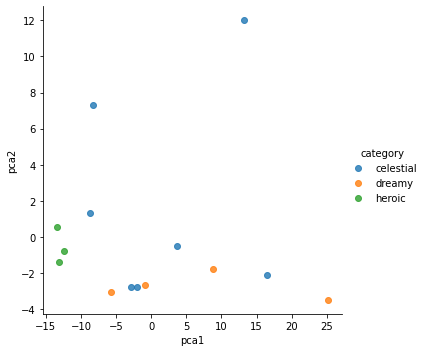

In [17]:
pca = PCA(n_components=2)
out_pca = pca.fit_transform(df[['mfcc5','mfcc6',]])
df_pca = pd.DataFrame(data = out_pca, columns=['pca1','pca2'])
df_pca = pd.concat([df_pca, df[['category']]], axis=1)
sns.lmplot(x='pca1', y='pca2', hue='category', data=df_pca, fit_reg=False)

In [13]:
print(pca.explained_variance_ratio_)

[0.88077145 0.11922855]


## 3) SeaBorn으로 시각화

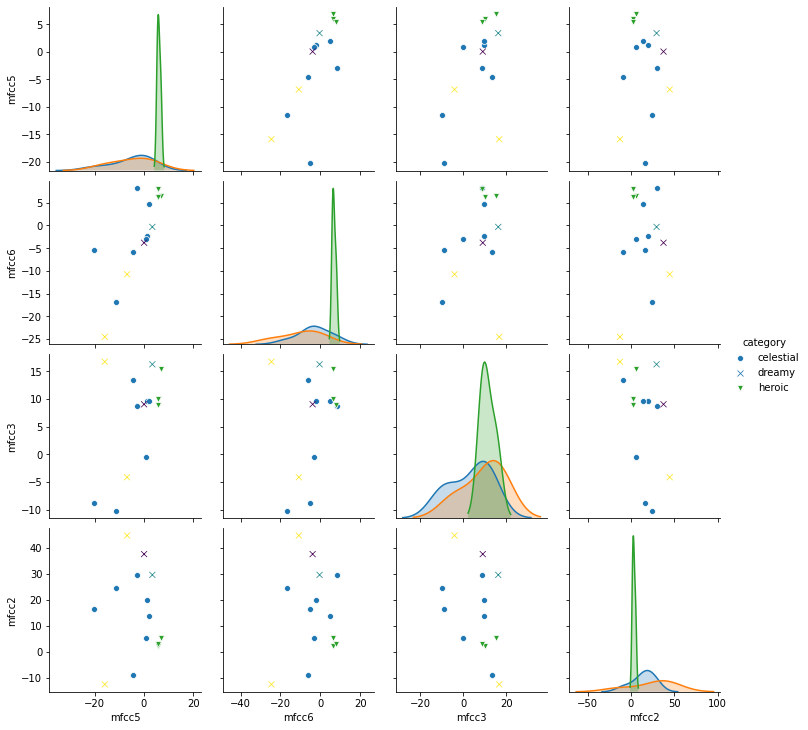

In [24]:
sns.pairplot(df,hue='category',vars=['mfcc5','mfcc6','mfcc3','mfcc2'],markers=['o','x','v'])

# 2. 클러스터링

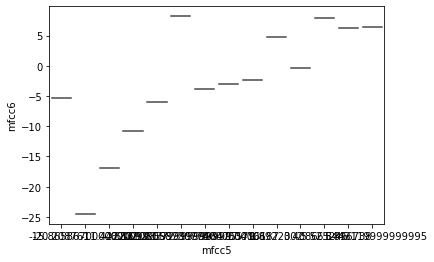

In [26]:
sns.violinplot(x='mfcc5',y='mfcc6',data=df)

In [33]:
clus = KMeans(n_clusters=5, tol=0.004, max_iter=300)
clus.fit(df.loc[:,'tempo':'mfcc10'])
df['K-Means Cluster Labels'] = clus.labels_
print(df['K-Means Cluster Labels'][:5].tolist())

[2, 1, 3, 2, 1]


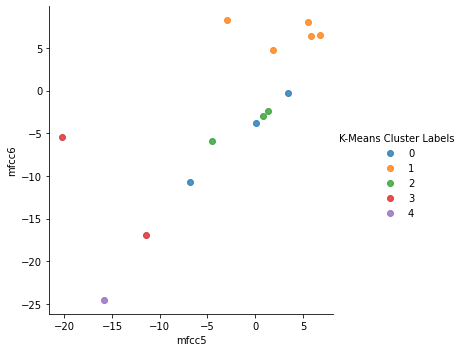

In [35]:
sns.lmplot(x='mfcc5', y='mfcc6',hue='K-Means Cluster Labels',data=df,fit_reg=False)

### K-means

### agglomerative clustering

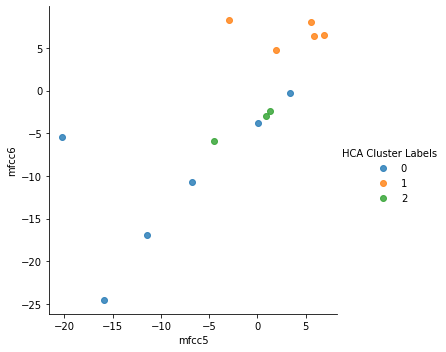

In [40]:
clus = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
clus.fit(df.loc[:,'tempo':'mfcc10'])
df['HCA Cluster Labels'] = clus.labels_
sns.lmplot(x='mfcc5',y='mfcc6',hue='HCA Cluster Labels',data=df,fit_reg=False)

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [20.0, 20.0, 42.5, 42.5],
  [5.0, 5.0, 31.25, 31.25],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [125.0, 125.0, 135.0, 135.0],
  [115.0, 115.0, 130.0, 130.0],
  [105.0, 105.0, 122.5, 122.5],
  [95.0, 95.0, 113.75, 113.75],
  [72.5, 72.5, 104.375, 104.375],
  [18.125, 18.125, 88.4375, 88.4375]],
 'dcoord': [[0.0, 29.247992964204148, 29.247992964204148, 0.0],
  [0.0, 18.954830387392356, 18.954830387392356, 0.0],
  [0.0, 50.366857172919325, 50.366857172919325, 18.954830387392356],
  [29.247992964204148, 79.4505582787699, 79.4505582787699, 50.366857172919325],
  [0.0, 85.50043703821198, 85.50043703821198, 79.4505582787699],
  [0.0, 19.81846219934795, 19.81846219934795, 0.0],
  [0.0, 30.06548159663148, 30.06548159663148, 19.81846219934795],
  [0.0, 15.924723293256665, 15.924723293256665, 0.0],
  [0.0, 27.636553035364404, 27.636553035364404, 15.924723293256665],
  [0.0, 40.084367548

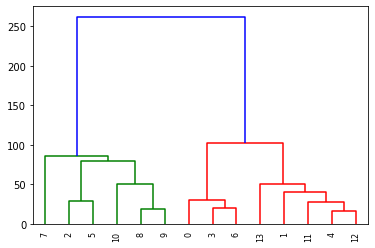

In [43]:
z = hierarchy.linkage(df.loc[:,'tempo':'mfcc10'],'ward')
hierarchy.dendrogram(z, leaf_rotation=90, leaf_font_size=8, labels=df.index)

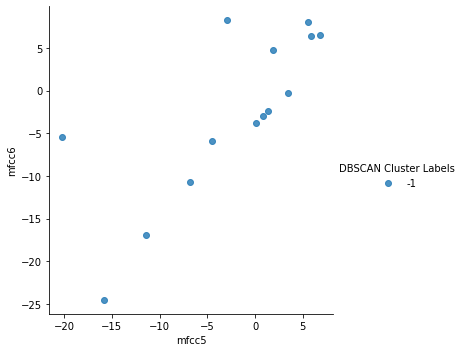

In [51]:
clus = DBSCAN(eps=0.9, min_samples=5, metric='euclidean')
clus.fit(df.loc[:,'tempo':'mfcc10'])
df['DBSCAN Cluster Labels'] = clus.labels_
sns.lmplot(x='mfcc5',y='mfcc6',hue='DBSCAN Cluster Labels', data=df, fit_reg=False)

### 밀도 클러스터링

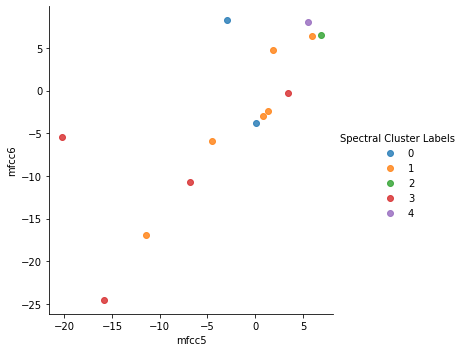

In [50]:
clus = SpectralClustering(n_clusters=5, random_state=42, assign_labels='kmeans', n_init=10, affinity='nearest_neighbors',n_neighbors=10)
clus.fit(df.loc[:,'tempo':'mfcc10'])
df['Spectral Cluster Labels'] = clus.labels_
sns.lmplot(x='mfcc5',y='mfcc6',hue='Spectral Cluster Labels',data=df,fit_reg=False)